In [21]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_excel('PacificWest-Customer-Campaign-data.xlsx')

# Data Exploratory Analysis

In [23]:
df.shape
(9134, 24)
df.head()

,Customer ID,State,Location Code,Gender,Marital Status,Education,Employment Status,Income (USD),Effective To Date,Customer Lifetime Value (USD),...,Policy,Months Since Policy Inception,Months Since Last Claim,Sales Channel,Response,Renew Offer Type,Number of Open Complaints,Total Claim Amount (USD),Vehicle Class,Vehicle Size
0,BU79786,Washington,Suburban,F,Married,Bachelor,Employed,56274,2011-02-24,2763.519279,...,Corporate L3,5,32,Agent,No,Offer1,0,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,Suburban,F,Single,Bachelor,Unemployed,0,2011-01-31,6979.535903,...,Personal L3,42,13,Agent,No,Offer3,0,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,Suburban,F,Married,Bachelor,Employed,48767,2011-02-19,12887.431650,...,Personal L3,38,18,Agent,No,Offer1,0,566.472247,Two-Door Car,Medsize
3,WW63253,California,Suburban,M,Married,Bachelor,Unemployed,0,2011-01-20,7645.861827,...,Corporate L2,65,18,Call Center,No,Offer1,0,529.881344,SUV,Medsize
4,HB64268,Washington,Rural,M,Single,Bachelor,Employed,43836,2011-02-03,2813.692575,...,Personal L1,44,12,Agent,No,Offer1,0,138.130879,Four-Door Car,Medsize


First, let's take a quick look at the dataset and remove unnecessary variables.
We'll directly drop customer id and effective to data.

In [24]:
df.drop(['Customer ID','Effective To Date'], axis = 1, inplace = True)

In [86]:
#Numeric vs Categorical variables

num_cols = list(df.select_dtypes(include = ['int','float']).columns)

cate_cols = list(df.select_dtypes(include = ['object']).columns)


In [92]:
#Check missing value
df.isnull().sum()

State                            0
Location Code                    0
Gender                           0
Marital Status                   0
Education                        0
Employment Status                0
Income (USD)                     0
Customer Lifetime Value (USD)    0
Coverage                         0
Monthly Premium Auto (USD)       0
Number of Policies               0
Policy Type                      0
Policy                           0
Months Since Policy Inception    0
Months Since Last Claim          0
Sales Channel                    0
Response                         0
Renew Offer Type                 0
Number of Open Complaints        0
Total Claim Amount (USD)         0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

Looks like there is no missing value in the data, but we need assess whether some of the '0' indicates a missing valuer. We'll handle this future in the data cleaning part.

In [31]:
#Replace category with number
result = {'Yes':1,'No':0}
df['Response'] = df['Response'].map(result)

Now, let's create some plots to find the insights.

## How many responsed?

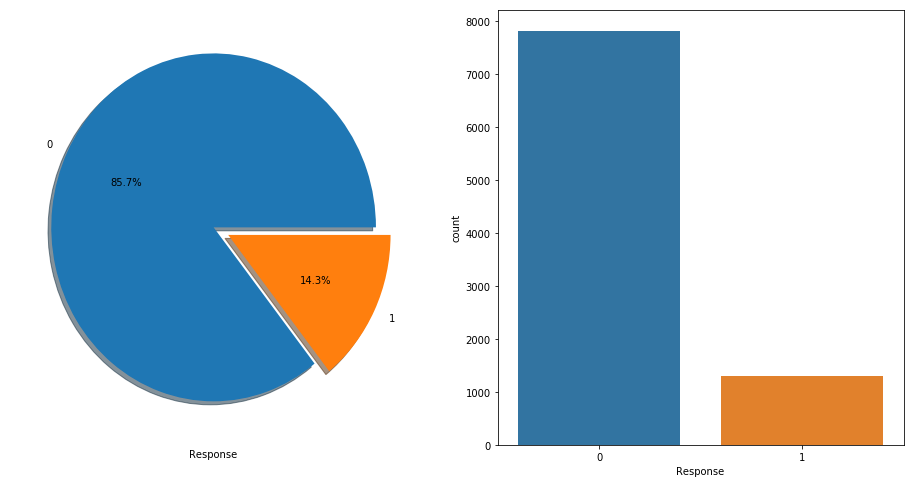

In [33]:
f, (ax1,ax2) = plt.subplots(1,2,figsize = (16,8))
df['Response'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, ax = ax1)
ax1.set_xlabel('Response')
ax1.set_ylabel('')

sns.countplot('Response',data=df, ax = ax2)
plt.show()

There are **14.3%** people responded to the campaign. We need to drill down more to get better insights from the data and see which categories of the passengers did responde and who didn't.

# Analyzing the Features

## 1. Categorical Features

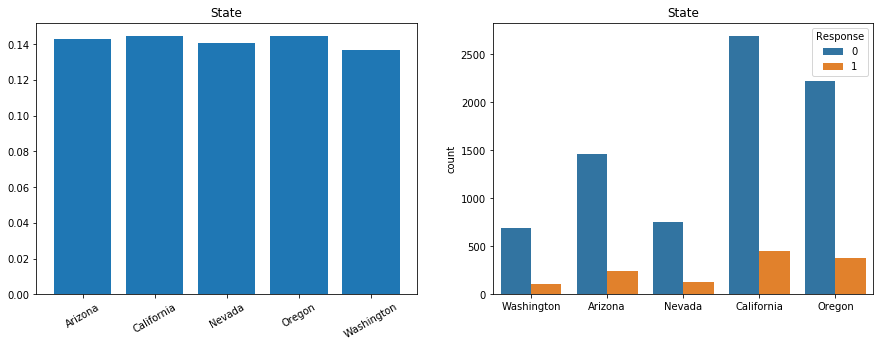

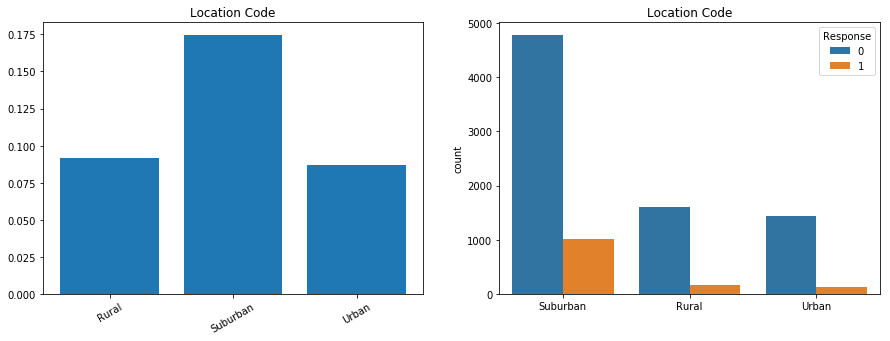

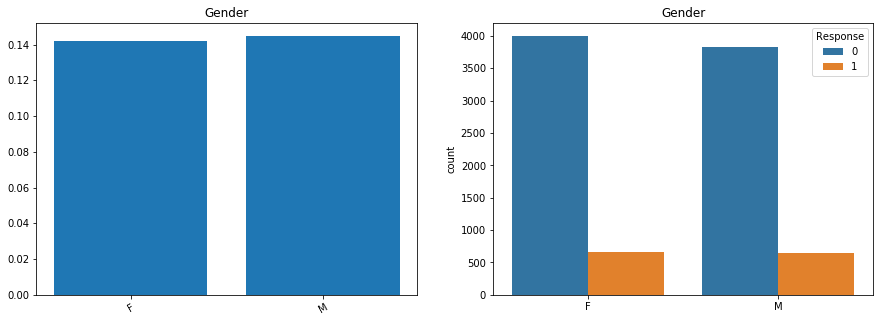

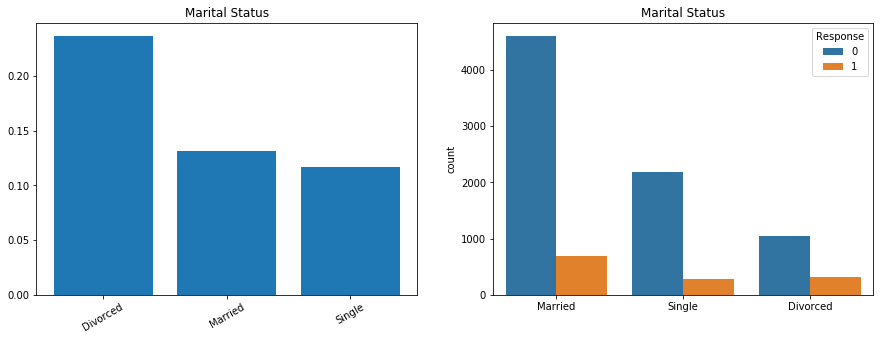

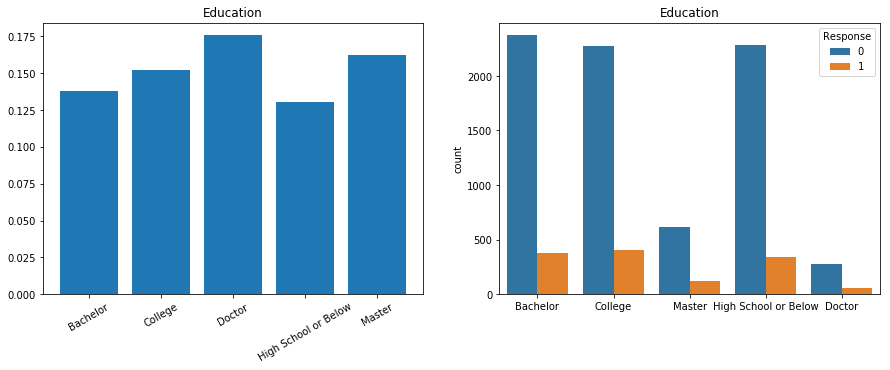

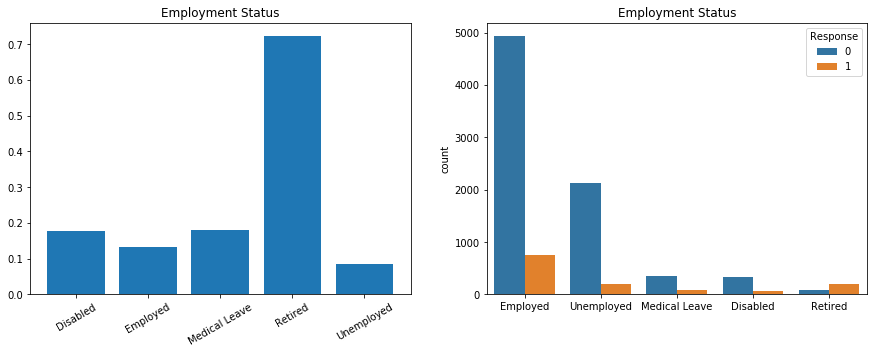

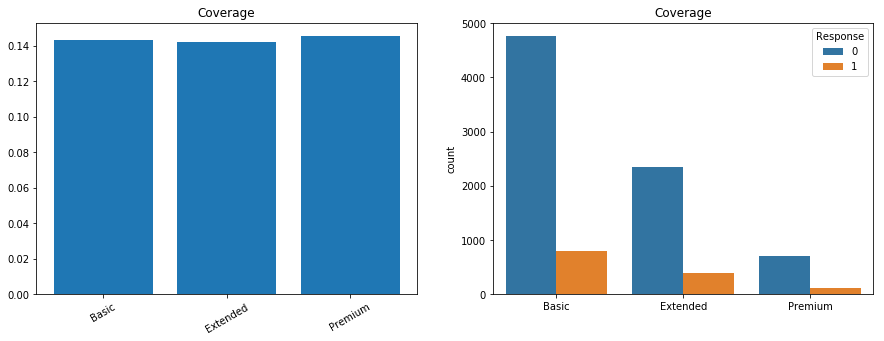

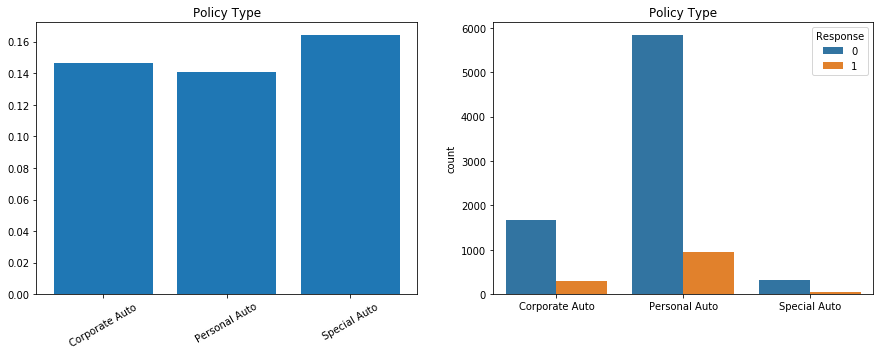

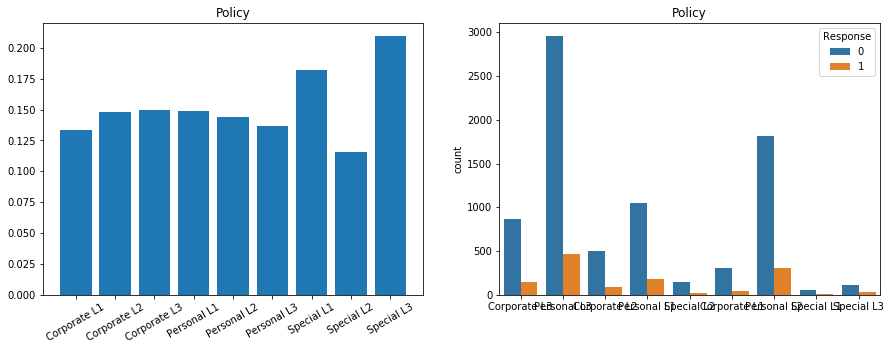

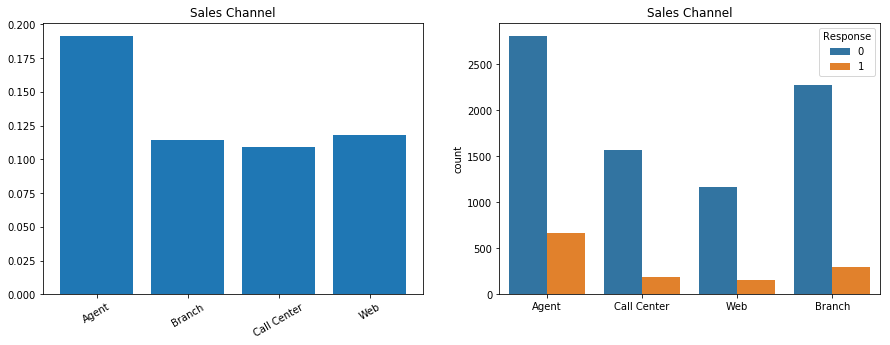

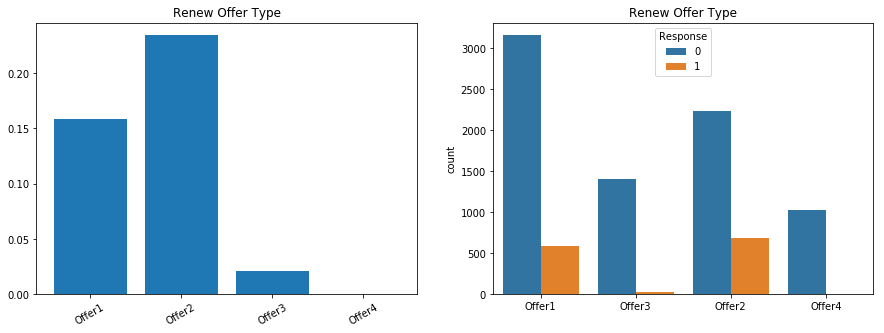

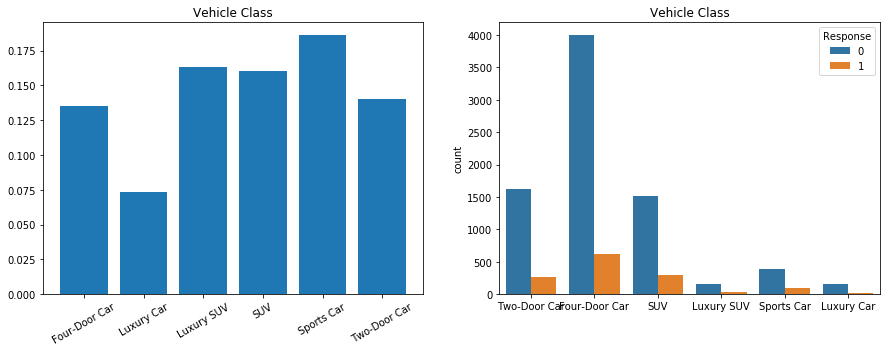

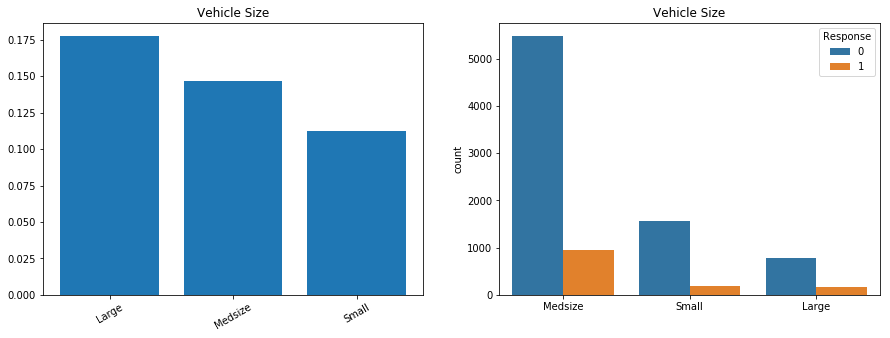

In [34]:
#Inspect categorical variables

for col in cate_cols:
    if col not in [ 'Response']:
        f,(axis1,axis2) = plt.subplots(1,2,figsize = (15,5))
        response_rate = df[[col,'Response']].groupby([col]).mean()
        N = len(list(response_rate.index))
        ind = np.arange(N)
        axis1.bar(ind, height = response_rate['Response'])
        axis1.set_xticks(ticks = list(ind))
        axis1.set_xticklabels(labels = list(response_rate.index), rotation=30)
        axis1.set_title(col)
        sns.countplot(col, hue = 'Response', data = df, ax = axis2).set_title(col)
        axis2.set_xlabel('')
        

### State

Small difference of response rate between each state. California and oregon have the most customers compared to other places.

### Location Code*

**Suburban** group has **extremly high** response rate compared to rural and urban, maybe because it's inconvenient to go to the store so they would easily make purchase online. Also, suburban have large customer groups, we should pay attention to this customer group becasue they are valuable.

### Gender

The response rate between man and women are about the same. We have slightly higher femal customer than male customer.

### Marital Status*

**Divorced** customer group has the **highest** response rate, however, they are only a small portion of our customer base. Married customer has highler response rate than single customer and we have more customer who are married. It's important to research on this finding to understand why our product is more attractive to married people than single customer.

###  Employee Status*

The **retired** customer group has **extremly highest** response rate but they are also the smallest group. This problem should be addressed to understand the gap between the low customer number and the high response rate. 

### Coverage

For each category, they have almost the same response rate which is a bit surprising to me. It means the content of the marketing campaign do not have targeting content to any of the group.

### Policy Type

Special auto has higher response rate than personal and corporate auto.

### Policy

Special L1 has the highest response rate as well as large customer numbers; Special L3 has the highest response rate and smallest customer numbers.

### Sales Channel

Agent is the channel with highest resposne rate and highest customer number. The other three channels have about the same response rate.

### Renew Offer Type*

The respose rate of offer 4 is 0! Further research should be done for offer 4. Offer 3 also has very low response rate, about 0.025. Offer 2 is the best performer with about 0.23 response rate and Offer 1 has 0.16 response rate.

### Vehicle Class*

Customer with different type of vehicles have quiet different response rate. Sports car receive the highest and luxury car is the lowest.

### Vehicle Size

There is a clearn rank of response rate for each vehicle size. Large > Middle > Small.

## 2. Numeric Variables

/Users/ziyuezhong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


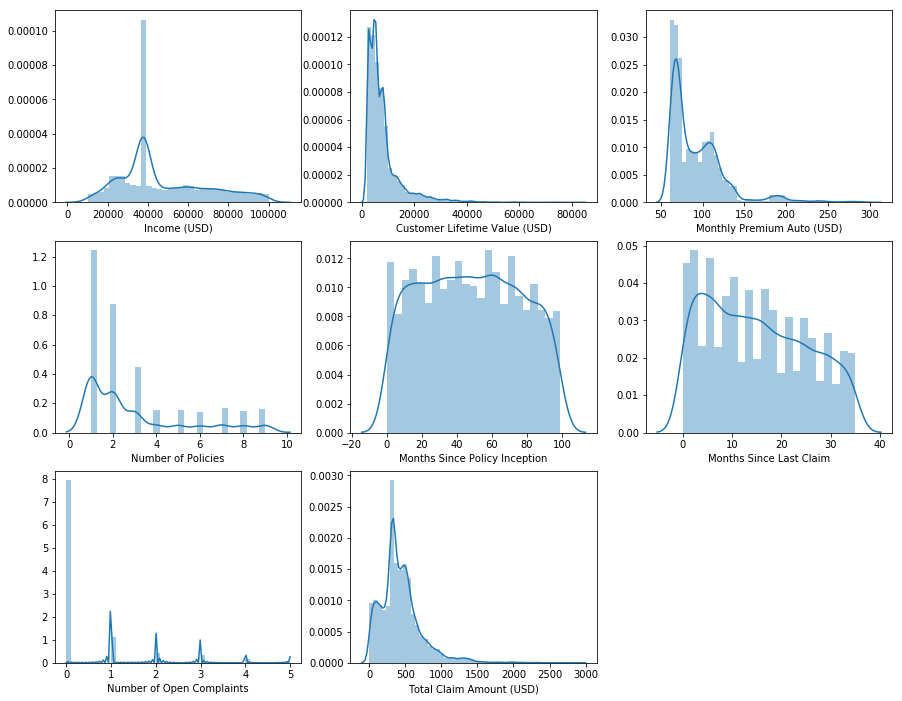

In [87]:
plt.figure(figsize = (15,12))
i =1
for col in num_cols:
    plt.subplot(3,3,i)
    sns.distplot(df[col])
    i+=1

Observation:

Most people's **Income** is in the range (10,000 - 100,000). There is large number of people having income 3800 USD.

**Customer Lifetime Value** is rightly skewed. Most customers are lower than 20,000 USD with a few higher than 20,000 USD.

**Monthly Premium Auto** is also rightly skewed. Most customer is lower than 150 USD.

**Number of Policies** is also rightly skewed. Most customer have 1-3 policies.

**Months Since Policy Inception** has low variance, therefore it be useful for the later model.

**Months Since Last Claim** is rightly skewed. The data range is (0-35).

Most people have 0 **Number of open compaints**.

**Total Claim Amount (USD)** is rightly skewed. Most people have about 500 total cliam amount (USD).



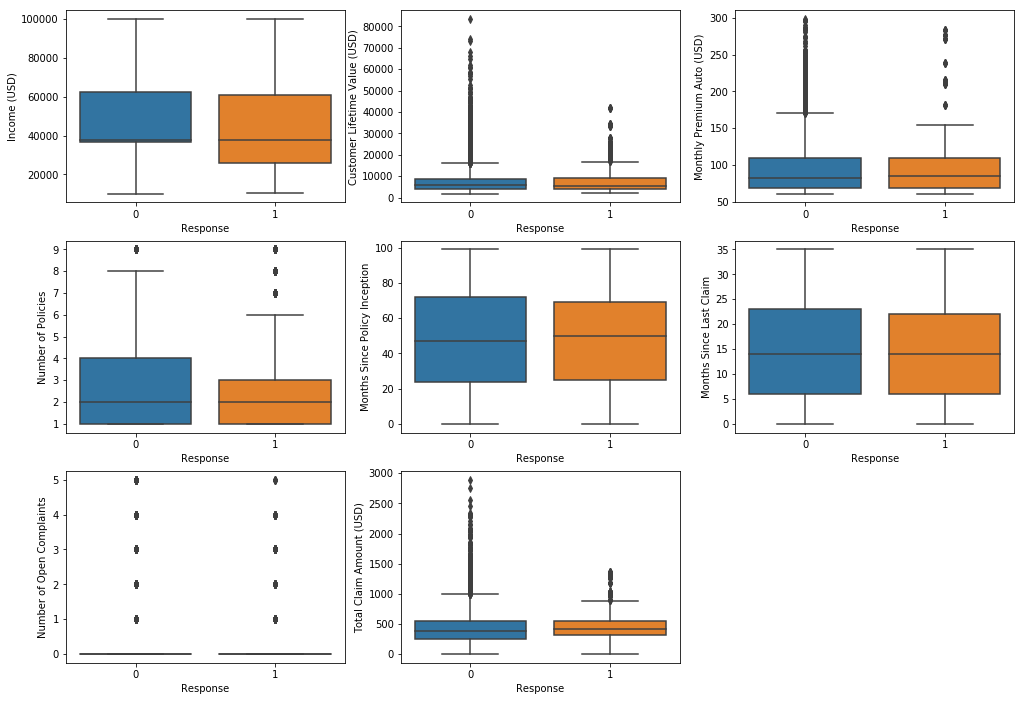

In [88]:
df['Response'] = df['Response'].astype('category')

plt.figure(figsize = (17,12))
i=1
for col in num_cols:
    plt.subplot(3,3,i)
    sns.boxplot(x="Response", y=col, data=df)
    i+=1

According to the previous boxplot:
only **Income** , **Number of Policies**, **Customer Lifetime value** and **Total claim amount**has significant difference between responsive customer and unresponsive customer. Other variables has unsignificant difference between the two groups, meaning they may not be an important feature for the prediction model.